In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


In [2]:
a = np.arange(1,55).reshape((3,3,6))
print(f'a:\n{a}')
b = np.pad(a, ((1,1),(1,1),(2,2)), 'constant')
print(f'b:\n{b}')
print(f'a\':\n{a}')

a:
[[[ 1  2  3  4  5  6]
  [ 7  8  9 10 11 12]
  [13 14 15 16 17 18]]

 [[19 20 21 22 23 24]
  [25 26 27 28 29 30]
  [31 32 33 34 35 36]]

 [[37 38 39 40 41 42]
  [43 44 45 46 47 48]
  [49 50 51 52 53 54]]]
b:
[[[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  1  2  3  4  5  6  0  0]
  [ 0  0  7  8  9 10 11 12  0  0]
  [ 0  0 13 14 15 16 17 18  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0 19 20 21 22 23 24  0  0]
  [ 0  0 25 26 27 28 29 30  0  0]
  [ 0  0 31 32 33 34 35 36  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0 37 38 39 40 41 42  0  0]
  [ 0  0 43 44 45 46 47 48  0  0]
  [ 0  0 49 50 51 52 53 54  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]


In [3]:
def padding(X, pad):
    
    '''
    X - 4-d array, 0d:m_samples, 1d:height, 2d:width, 3d:channels
    pad - int, padding in both height and width
    '''

    X_padding = np.pad(
        X,
        (
            (0,0),      # 0d: m_samples
            (pad,pad),  # 1d: height
            (pad,pad),  # 2d: width
            (0,0)),     # 3d: channels
        'constant')
    
    return X_padding

In [4]:
a = a.reshape((1,3,6,3)) + 150
print(f'a: {a.shape}\n{a}')
a_padding = padding(a, 2)
print(f'a_padding: {a_padding.shape}\n{a_padding}')

a: (1, 3, 6, 3)
[[[[151 152 153]
   [154 155 156]
   [157 158 159]
   [160 161 162]
   [163 164 165]
   [166 167 168]]

  [[169 170 171]
   [172 173 174]
   [175 176 177]
   [178 179 180]
   [181 182 183]
   [184 185 186]]

  [[187 188 189]
   [190 191 192]
   [193 194 195]
   [196 197 198]
   [199 200 201]
   [202 203 204]]]]
a_padding: (1, 7, 10, 3)
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [151 152 153]
   [154 155 156]
   [157 158 159]
   [160 161 162]
   [163 164 165]
   [166 167 168]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [169 170 171]
   [172 173 174]
   [175 176 177]
   [178 179 180]
   [181 182 183]
   [184 185

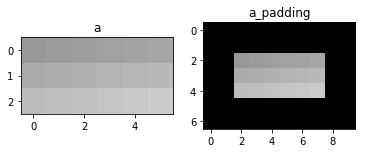

In [5]:
plt.subplot(1, 2, 1)
plt.title('a')
plt.imshow(a[0])
plt.subplot(1, 2, 2)
plt.title('a_padding')
plt.imshow(a_padding[0])

In [6]:
def conv_one_step(x, W, b):
    
    '''
    x - part of X: shape(m, f, f, c)
    W - weights of filter: shape(f, f, c)
    b - bias of filter: shape(1, 1, 1)
    return shape(m,)
    '''

    z = np.sum(x * W, axis=(1,2,3)) + b  # shape(m,)
    
    return z

In [7]:
def conv_forwardprop(X, W, b, p=0, s=1):

    '''
    X - input, (m_samples, height, width, channels)
    W - weights of filters, (f, f, channels, n_filters)
    b - bias of filters, (1,1,1,n_filters)
    p - pad
    s - stride
    '''

    m, h, w, c = X.shape
    f = W.shape[0]
    n = W.shape[3]
    h_new = (h + 2*p - f) // s + 1
    w_new = (w + 2*p - f) // s + 1
    c_new = n
    Z = np.zeros((m, h_new, w_new, c_new))
    X_padding = padding(X, p)

    for l in range(c_new):
        for i in range(h_new):
            for j in range(w_new):
                x_step = X_padding[:, (s*i):(s*i+f), (s*j):(s*j+f), :]  # shape(m,f,f,c)
                W_step = W[:, :, :, l]  # shape(f,f,c)
                b_step = b[:, :, :, l]  # shape(1,1,1)
                Z[:, i, j, l] = conv_one_step(x_step, W_step, b_step)  # shape(m,)
    
    cache = (X_padding, W, b, p, s)
    return Z, cache


In [8]:
# 测试
X = np.ones((2,5,5,3))
W = np.ones((3,3,3,6)) * 2
b = np.ones((1,1,1,6)) * 3
Z, _ = conv_forwardprop(X, W, b)  # ones((2,3,3,6)) * 57
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 3, 3, 6)
[[[[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]]


 [[[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]]]


In [9]:
# 加上pad测试same convolution
X = np.ones((2,5,5,3))
W = np.ones((3,3,3,6)) * 2
b = np.ones((1,1,1,6)) * 3
Z, _ = conv_forwardprop(X, W, b, p=1)  # ones((2,5,5,6)) mid=57
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 5, 5, 6)
[[[[27. 27. 27. 27. 27. 27.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [27. 27. 27. 27. 27. 27.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [39. 39. 39. 39. 39. 39.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [39. 39. 39. 39. 39. 39.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [39. 39. 39. 39. 39. 39.]]

  [[27. 27. 27. 27. 27. 27.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [27. 27. 27. 27. 27. 27.]]]


 [[[27. 27. 27. 27. 27. 27.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [27. 27. 27. 27. 27. 27.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 5

In [10]:
def pool_forwardprop(X, f, mode='max', p=0, s=1):

    '''
    X - input, (m_samples, height, width, channels)
    f - size of pool(f, f)
    mode - str, 'max' or 'average' pooling
    p - pad
    s - stride
    '''

    m, h, w, c = X.shape
    h_new = (h + 2*p - f) // s + 1
    w_new = (w + 2*p - f) // s + 1
    c_new = c
    Z = np.zeros((m, h_new, w_new, c_new))
    X_padding = padding(X, p)

    for l in range(c_new):
        for i in range(h_new):
            for j in range(w_new):
                x_step = X_padding[:, (s*i):(s*i+f), (s*j):(s*j+f), l]  # shape(m,f,f)
                if mode == 'max':
                    Z[:, i, j, l] = np.max(x_step, axis=(1,2))  # shape(m,)
                elif mode == 'average':
                    Z[:, i, j, l] = np.mean(x_step, axis=(1,2))  # shape(m,)
                else:
                    print('Unexcepted mode.')
    
    cache = (X_padding, f, p, s)
    return Z, cache


In [11]:
# 测试
a = np.arange(72).reshape((2,4,3,3))
f = 2
Z, _ = pool_forwardprop(a, f)  # (2,3,2,3)
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 3, 2, 3)
[[[[12. 13. 14.]
   [15. 16. 17.]]

  [[21. 22. 23.]
   [24. 25. 26.]]

  [[30. 31. 32.]
   [33. 34. 35.]]]


 [[[48. 49. 50.]
   [51. 52. 53.]]

  [[57. 58. 59.]
   [60. 61. 62.]]

  [[66. 67. 68.]
   [69. 70. 71.]]]]


In [12]:
# 试试same average pooling
a = np.arange(72).reshape((2,4,3,3))
f = 3
Z, _ = pool_forwardprop(a, f, mode='average', p=1)  # (2,4,3,3)
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 4, 3, 3)
[[[[ 2.66666667  3.11111111  3.55555556]
   [ 5.          5.66666667  6.33333333]
   [ 4.          4.44444444  4.88888889]]

  [[ 7.          7.66666667  8.33333333]
   [12.         13.         14.        ]
   [ 9.          9.66666667 10.33333333]]

  [[13.         13.66666667 14.33333333]
   [21.         22.         23.        ]
   [15.         15.66666667 16.33333333]]

  [[10.66666667 11.11111111 11.55555556]
   [17.         17.66666667 18.33333333]
   [12.         12.44444444 12.88888889]]]


 [[[18.66666667 19.11111111 19.55555556]
   [29.         29.66666667 30.33333333]
   [20.         20.44444444 20.88888889]]

  [[31.         31.66666667 32.33333333]
   [48.         49.         50.        ]
   [33.         33.66666667 34.33333333]]

  [[37.         37.66666667 38.33333333]
   [57.         58.         59.        ]
   [39.         39.66666667 40.33333333]]

  [[26.66666667 27.11111111 27.55555556]
   [41.         41.66666667 42.33333333]
   [28.         28.444444

### 以上实现了padding，convolution，pooling

In [13]:
def conv_backwardprop(dZ, cache):

    '''
    dZ - dJ/dZ, (m_samples, h_new, w_new, n_filters), n_filters = c_new
    cache - (X_padding, W, b, p, s)
    '''

    X_padding, W, b, p, s = cache
    m, h_new, w_new, n = dZ.shape
    f = W.shape[0]
    dW = np.zeros(W.shape)
    db = np.zeros(b.shape)
    dX_padding = np.zeros(X_padding.shape)

    for l in range(n):
        for i in range(h_new):
            for j in range(w_new):
                x_step = X_padding[:, (i*s):(i*s+f), (i*s):(i*s+f), :]  # (m,f,f,c)
                dZ_step = dZ[:, i, j, l].reshape((m,1,1,1))  # (m,) -> (m,1,1,1)
                dW[:, :, :, l] += np.mean((x_step * dZ_step), axis=0)  # (m,f,f,c) -> (f,f,c)
                db[0,0,0,l] += np.mean(dZ_step)
                dX_padding[:, (i*s):(i*s+f), (i*s):(i*s+f), :] += dZ_step * W[:, :, :, l]  # (m,1,1,1)*(f,f,c) -> (m,f,f,c)

    h = (h_new - 1) * s + f - 2*p
    w = (w_new - 1) * s + f - 2*p
    dX = dX_padding[:, p:(h-p), p:(w-p), :]

    return dX, dW, db

In [14]:
# 测试
X = np.ones((2,5,5,3))
W = np.ones((3,3,3,6)) * 2
b = np.ones((1,1,1,6)) * 3
Z, cache = conv_forwardprop(X, W, b)  # ones((2,3,3,6)) * 57
dZ = Z * 0.5  # A = 0.25 * Z**2
dX, dW, db = conv_backwardprop(dZ, cache)
print(f'dX: {dX.shape}\n{dX}')  # (2,5,5,3)
print(f'dW: {dW.shape}\n{dW}')  # (3,3,3,6)
print(f'db: {db.shape}\n{db}')  # (1,1,1,6)

dX: (2, 5, 5, 3)
[[[[1026. 1026. 1026.]
   [1026. 1026. 1026.]
   [1026. 1026. 1026.]
   [   0.    0.    0.]
   [   0.    0.    0.]]

  [[1026. 1026. 1026.]
   [2052. 2052. 2052.]
   [2052. 2052. 2052.]
   [1026. 1026. 1026.]
   [   0.    0.    0.]]

  [[1026. 1026. 1026.]
   [2052. 2052. 2052.]
   [3078. 3078. 3078.]
   [2052. 2052. 2052.]
   [1026. 1026. 1026.]]

  [[   0.    0.    0.]
   [1026. 1026. 1026.]
   [2052. 2052. 2052.]
   [2052. 2052. 2052.]
   [1026. 1026. 1026.]]

  [[   0.    0.    0.]
   [   0.    0.    0.]
   [1026. 1026. 1026.]
   [1026. 1026. 1026.]
   [1026. 1026. 1026.]]]


 [[[1026. 1026. 1026.]
   [1026. 1026. 1026.]
   [1026. 1026. 1026.]
   [   0.    0.    0.]
   [   0.    0.    0.]]

  [[1026. 1026. 1026.]
   [2052. 2052. 2052.]
   [2052. 2052. 2052.]
   [1026. 1026. 1026.]
   [   0.    0.    0.]]

  [[1026. 1026. 1026.]
   [2052. 2052. 2052.]
   [3078. 3078. 3078.]
   [2052. 2052. 2052.]
   [1026. 1026. 1026.]]

  [[   0.    0.    0.]
   [1026. 1026. 1026.]

In [15]:
def mask_max(x):
    
    '''
    input:
        x - (f, f)
    output:
        mask - (f, f)
    '''

    mask = (x == np.max(x))
    
    return mask

In [16]:
def mask_average(f):

    '''
    input:
        f - filter size
    output:
        mask - (f, f)
    '''

    mask = np.ones((f, f)) / (f * f)
    
    return mask

In [17]:
def pool_backwardprop(dZ, cache, mode='max'):

    '''
    input:
        dZ - dJ/dZ, (m_samples, h_new, w_new, channels)
        cache - (X_padding, f, p, s)
        mode - str, 'max' or 'average'
    output:
        dX - (m, h-2p, w-2p, c)
    '''

    X_padding, f, p, s = cache
    m, h_new, w_new, c = dZ.shape
    h = (h_new - 1) * s + f - 2*p
    w = (w_new - 1) * s + f - 2*p
    # X_padding - (m,h,w,c)
    dX_padding = np.zeros_like(X_padding, dtype=np.float)

    for m_ in range(m):
        X_m = X_padding[m_, :, :, :]  # (h,w,c)
        dZ_m = dZ[m_, :, :, :]  # (h_new,w_new,c)
        for c_ in range(c):
            X_mc = X_m[:, :, c_]  # (h,w)
            dZ_mc = dZ_m[:, :, c_]  # (h_new,w_new)
            for i in range(h_new):
                for j in range(w_new):
                    if mode == 'max':
                        X_window = X_mc[(i*s):(i*s+f), (j*s):(j*s+f)]
                        mask = mask_max(X_window)
                        dX_padding[m_, (i*s):(i*s+f), (j*s):(j*s+f), c_] += dZ_mc[i,j] * mask  # (f,f)
                    elif mode == 'average':
                        dX_padding[m_, (i*s):(i*s+f), (j*s):(j*s+f), c_] += dZ_mc[i,j] * mask_average(f)  # (f,f)
                    else:
                        print('Unexcepted mode.')
    
    dX = dX_padding[:, p:(h-p), p:(w-p), :]

    return dX

In [18]:
# 测试
a = np.arange(72).reshape((2,4,3,3))  # a-(2,4,3,3)
f = 2  # filter-(2,2)
Z, cache = pool_forwardprop(a, f)  # (2,3,2,3)
dZ = Z * 0.5  # A = 0.25 * Z**2
dX = pool_backwardprop(dZ, cache, mode='max')
print(f'dZ: {dZ.shape}\n{dZ}')  # (2,3,2,3)
print(f'dX: {dX.shape}\n{dX}')  # (2,4,3,3) -> [0,:,:,0] == 0,0,0; 0,6,7.5; 0,10.5,12; 0,15,16.5

dZ: (2, 3, 2, 3)
[[[[ 6.   6.5  7. ]
   [ 7.5  8.   8.5]]

  [[10.5 11.  11.5]
   [12.  12.5 13. ]]

  [[15.  15.5 16. ]
   [16.5 17.  17.5]]]


 [[[24.  24.5 25. ]
   [25.5 26.  26.5]]

  [[28.5 29.  29.5]
   [30.  30.5 31. ]]

  [[33.  33.5 34. ]
   [34.5 35.  35.5]]]]
dX: (2, 4, 3, 3)
[[[[ 0.   0.   0. ]
   [ 0.   0.   0. ]
   [ 0.   0.   0. ]]

  [[ 0.   0.   0. ]
   [ 6.   6.5  7. ]
   [ 7.5  8.   8.5]]

  [[ 0.   0.   0. ]
   [10.5 11.  11.5]
   [12.  12.5 13. ]]

  [[ 0.   0.   0. ]
   [15.  15.5 16. ]
   [16.5 17.  17.5]]]


 [[[ 0.   0.   0. ]
   [ 0.   0.   0. ]
   [ 0.   0.   0. ]]

  [[ 0.   0.   0. ]
   [24.  24.5 25. ]
   [25.5 26.  26.5]]

  [[ 0.   0.   0. ]
   [28.5 29.  29.5]
   [30.  30.5 31. ]]

  [[ 0.   0.   0. ]
   [33.  33.5 34. ]
   [34.5 35.  35.5]]]]


### 以上实现了convolution, pooling 反向传播

In [19]:
import math
import matplotlib.image as image
import tensorflow as tf
from tensorflow.python.framework import ops
import os
os.chdir('./4-1/')
import cnn_utils

In [20]:
X_train, Y_train, X_test, Y_test, classes =cnn_utils.load_dataset()

X_train.shape = (1080, 64, 64, 3)
Y_train.shape = (1, 1080)
X_test.shape = (120, 64, 64, 3)
Y_test.shape = (1, 120)
classes.shape = (6,)
classes = [0 1 2 3 4 5]
Y = 1


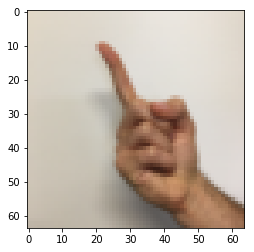

In [21]:
print(f'X_train.shape = {X_train.shape}')
print(f'Y_train.shape = {Y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'Y_test.shape = {Y_test.shape}')
print(f'classes.shape = {classes.shape}')
print(f'classes = {classes}')
print(f'Y = {Y_train[0,11]}')
plt.imshow(X_train[11])

In [22]:
C = len(classes)
X_train = X_train / 255
Y_train = cnn_utils.convert_to_one_hot(Y_train, C).T
X_test = X_test / 255
Y_test = Y_test.T
print(f'X_train.shape = {X_train.shape}')
print(f'Y_train.shape = {Y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'Y_test.shape = {Y_test.shape}')

X_train.shape = (1080, 64, 64, 3)
Y_train.shape = (1080, 6)
X_test.shape = (120, 64, 64, 3)
Y_test.shape = (120, 1)


In [23]:
def create_placeholders(n_h, n_w, n_c, n_y):
    
    x = tf.placeholder(tf.float32, [None, n_h, n_w, n_c])
    y = tf.placeholder(tf.float32, [None, n_y])
    
    return x, y

### -> input
- X - (1080, 64, 64, 3)
### -> conv (same)
- s = 1
- W1 - (4, 4, 3, 8)
- Z1 - (1080, 64, 64, 8)
### -> relu 
- A1 - (1080, 64, 64, 8)
### -> maxpool (same)
- s = 8
- f = 8
- P1 - (1080, 8, 8, 8)
### -> conv (same)
- s = 1
- W2 - (2, 2, 8, 16)
- Z2 - (1080, 8, 8, 16)
### -> relu
- A2 - (1080, 8, 8, 16)
### -> maxpool (same)
- s = 4
- f = 4
- P2 - (1080, 2, 2, 16)
### -> fc (linear output)
- 2\*2\*16 -> 6
- Z3 - (1080, 6)
### -> softmax
- run in optimizer

In [24]:
def init_params():
    
    W1 = tf.get_variable('W1', [4,4,3,8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable('W2', [2,2,8,16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    params = {
        'W1': W1,
        'W2': W2
    }
    
    return params

In [25]:
def forward_prop(X, params):

    W1 = params['W1']
    W2 = params['W2']

    # 1. conv2d -> relu -> maxpool
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding='SAME')

    # 2. conv2d -> relu -> maxpool
    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize=[1,4,4,1], strides=[1,4,4,1], padding='SAME')

    # 3. flatten
    P = tf.contrib.layers.flatten(P2)

    # 4. FC(linear)
    Z3 = tf.contrib.layers.fully_connected(P, 6, activation_fn=None)

    return Z3

In [26]:
def compute_cost(Z3, Y):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
    # (m_batches, n_features)
    
    return cost

No.1 iteration's loss: 1.778266191482544
No.100 iteration's loss: 0.05900024622678757
No.200 iteration's loss: 0.01004706509411335
No.300 iteration's loss: 0.005345967132598162
No.400 iteration's loss: 0.0007459539920091629
No.500 iteration's loss: 0.00032503335387445986


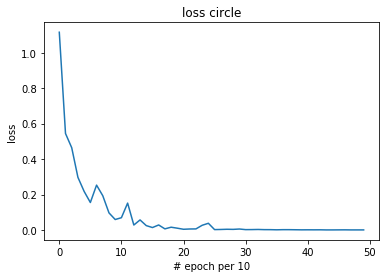

In [33]:
# 定义变量
X = X_train
Y = Y_train
alpha = 0.005
epochs = 500
batch_size = 64

ops.reset_default_graph()

m, n_h, n_w, n_c = X.shape
n_y = Y.shape[1]

# set placeholder for mini-batch
x, y = create_placeholders(n_h, n_w, n_c, n_y)
# initial weights
params = init_params()
# forwardprop
Z3 = forward_prop(x, params)
# compute cost
cost = compute_cost(Z3, y)
# use optimizer to backprop and update parameters
optimizer = tf.train.AdamOptimizer(learning_rate=alpha).minimize(cost)
# initialize all variables
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
seed = 0
J_list = []
for i in range(epochs):
    seed += 1
    # segment train set to mini-batches
    mini_batches = cnn_utils.random_mini_batches(X, Y, mini_batch_size=batch_size, seed=seed)
    for batch in mini_batches:
        X_mini, Y_mini = batch
        _, J = sess.run([optimizer, cost], feed_dict={x: X_mini, y: Y_mini})
    if i == 0:
        print(f'No.{i+1} iteration\'s loss: {J}')
    if (i+1) % 10 == 0:
        J_list.append(J)
    if (i+1) % 100 == 0:
        print(f'No.{i+1} iteration\'s loss: {J}')

plt.plot(J_list)
plt.title('loss circle')
plt.xlabel('# epoch per 10')
plt.ylabel('loss')
plt.show()


In [34]:
# predict
Z3_test = sess.run(Z3, feed_dict={x:X_test.astype(np.float32)})
Y_predict = np.argmax(Z3_test, axis=1)
accuracy = np.mean(np.squeeze(Y_test) == Y_predict)
print(f'accuracy = {accuracy}')

accuracy = 0.8833333333333333


In [35]:
sess  # 模型和参数都保存在当前会话中, 所以要在会话中预测和保存, 否则模型将无法获取

In [36]:
saver = tf.train.Saver()
saver.save(sess, 'F:/deeplearning-study/4-1/cnn_model')

'F:/deeplearning-study/4-1/cnn_model'

### cnn拟合的结果很不错, 准确率也比2-3中的全连接模型高